In [1]:
import sys

In [2]:
cd '/home/paperspace/fastai'

/home/paperspace/fastai


In [3]:
sys.path.append("../../fastai/")

In [4]:
from fastai.structured import *
from fastai.column_data import *

In [5]:
import pandas as pd
import numpy as np

In [6]:
cd '/home/paperspace/santander/'

/home/paperspace/santander


In [7]:
ls

models/                santander1.ipynb         test.csv  train.csv
sample_submission.csv  santander_updated.ipynb  tmp/


In [8]:
PATH = '/home/paperspace/santander/'

In [9]:
table_names = ['train', 'test', 'sample_submission']
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory=False) for fname in table_names]

In [10]:
from IPython.display import HTML, display

In [11]:
for t in tables: display(t.head())

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ID,target
0,000137c73,5.944923e+06
1,00021489f,5.944923e+06
2,0004d7953,5.944923e+06
3,00056a333,5.944923e+06
4,00056d8eb,5.944923e+06


In [12]:
#for t in tables: display(DataFrameSummary(t).summary())

In [13]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    
    return left.merge(right, how='left', left_on=left_on,
        right_on=right_on, suffixes=("", suffix))

In [14]:
train, test, sample_submission = tables

In [15]:
#train.head()

In [16]:
len(train), len(test)

(4459, 49342)

In [17]:
#train.nunique().value_counts() #get unique count for each column

In [18]:
xx = train.nunique(),
xx

(ID           4459
 target       1413
 48df886f9      32
 0deb4b6a8       5
 34b15f335      29
 a8cb14b00       3
 2f0771a37       6
 30347e683      25
 d08d1fbe3       6
 6ee66e115       6
 20aa07010     714
 dc5a8f1d8      56
 11d86fa6a      86
 77c9823f2       2
 8d6c2a0b2       7
 4681de4fd     236
 adf119b9a      76
 cff75dd09      28
 96f83a237      16
 b8a716ebf     128
 6c7a4567c      26
 4fcfd2b4d       5
 f3b9c0b95      20
 71cebf11c      19
 d966ac62c      40
 68b647452      94
 c88d108c9      10
 ff7b471cd       5
 d5308d8bc       1
 0d866c3d7     125
              ... 
 cdfc2b069     243
 2a879b4f7     120
 6b119d8ce     175
 98dea9e42       5
 9f2471031       2
 88458cb21      11
 f40da20f4      12
 7ad6b38bd      91
 c901e7df1      85
 8f55955dc       4
 85dcc913d      60
 5ca0b9b0c       2
 eab8abf7a     113
 8d8bffbae     193
 2a1f6c7f9      27
 9437d8b64     260
 5831f4c76     301
 2e84e09c5       2
 d45fd5508      15
 a165f5761      63
 3ecc09859     103
 9281abeea  

In [19]:
xx = train.nunique()
#to_remove = pd.DataFrame(xx).index[np.logical_or(np.logical_and(xx < 100, xx > 10),xx == 1)]
to_remove = pd.DataFrame(xx).index[xx < 100]

In [20]:
cat1 = ['0deb4b6a8']
to_remove = list(np.setxor1d(to_remove, cat1))

In [21]:
train = train.drop(to_remove, axis = 1)
test = test.drop(to_remove, axis = 1)

In [22]:
for i in cat1:
    test[i] = test[i].apply(int)

In [23]:
train.shape

(4459, 1276)

In [24]:
test.shape

(49342, 1275)

In [25]:
train.head(2)

,ID,target,0deb4b6a8,20aa07010,4681de4fd,b8a716ebf,0d866c3d7,bd8f989f1,22ed6dba3,92b13ebba,...,cdfc2b069,2a879b4f7,6b119d8ce,eab8abf7a,8d8bffbae,9437d8b64,5831f4c76,3ecc09859,9281abeea,8675bec0b
0,000d6aaf2,38000000.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,1200000.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0
1,000fbd867,600000.0,0,2200000.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0


In [26]:
#xx = train.nunique()
#cat_vars = list(pd.DataFrame(xx).index[xx < 10])
#contin_vars = list(pd.DataFrame(xx).index[xx > 50])
contin_vars = list(train.columns)[3:]
cat_vars = ['0deb4b6a8']
len(cat_vars), len(contin_vars)

(1, 1273)

In [27]:
n = len(train); n

4459

In [28]:
for i in cat_vars:
    train[i] = train[i].apply(str)
#train[cat_vars] = train[cat_vars].apply(str)

In [29]:
for i in cat_vars:
    test[i] = test[i].apply(str)

In [30]:
list(cat_vars)

['0deb4b6a8']

In [31]:
dep = 'target'
joined = train[cat_vars+contin_vars+[dep]].copy()

In [32]:
test[dep] = 0
joined_test = test[cat_vars+contin_vars+[dep, 'ID']].copy()

In [33]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [34]:
apply_cats(joined_test, joined)

In [35]:
joined_test.head(),joined.head()

(  0deb4b6a8  20aa07010  4681de4fd  b8a716ebf  0d866c3d7   bd8f989f1  \
 0         0        0.0        0.0        0.0        0.0         0.0   
 1         0        0.0        0.0        0.0        0.0         0.0   
 2         0        0.0        0.0        0.0        0.0         0.0   
 3         0        0.0        0.0        0.0        0.0  20884000.0   
 4         0        0.0        0.0        0.0        0.0         0.0   
 
    22ed6dba3  92b13ebba  233c7c17c   87ffda550    ...      6b119d8ce  \
 0        0.0        0.0        0.0         0.0    ...            0.0   
 1        0.0        0.0        0.0         0.0    ...            0.0   
 2        0.0        0.0        0.0         0.0    ...            0.0   
 3        0.0        0.0        0.0  20000000.0    ...            0.0   
 4        0.0        0.0        0.0         0.0    ...            0.0   
 
    eab8abf7a  8d8bffbae  9437d8b64  5831f4c76  3ecc09859  9281abeea  \
 0        0.0        0.0        0.0        0.0        

In [36]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [37]:
df, y, nas, mapper = proc_df(joined, 'target', do_scale=True)
yl = np.log(y)

In [38]:
df_test, _, nas, mapper = proc_df(joined_test, 'target', do_scale=True, skip_flds=['ID'],
                                  mapper=mapper, na_dict=nas)

In [39]:
df.head(2)

,0deb4b6a8,20aa07010,4681de4fd,b8a716ebf,0d866c3d7,bd8f989f1,22ed6dba3,92b13ebba,233c7c17c,87ffda550,...,cdfc2b069,2a879b4f7,6b119d8ce,eab8abf7a,8d8bffbae,9437d8b64,5831f4c76,3ecc09859,9281abeea,8675bec0b
0,1,-0.267393,-0.145479,-0.122579,-0.106546,-0.195458,-0.190989,-0.131103,-0.109261,0.006855,...,0.098504,-0.109831,-0.136631,-0.108148,-0.117917,-0.103842,-0.181415,-0.114959,-0.100403,-0.178522
1,1,-0.038443,-0.145479,-0.122579,-0.106546,-0.195458,-0.190989,-0.131103,-0.109261,-0.169767,...,-0.181402,-0.109831,-0.136631,-0.108148,-0.117917,-0.103842,-0.181415,-0.114959,-0.100403,-0.178522


In [40]:
train_ratio = 0.75
msk = np.random.rand(len(df)) > 0.75
val_idx = df.index[msk]
len(val_idx)

1144

In [41]:
#val_idx = np.flatnonzero(val_idx),
#val_idx = [0]
val_idx = list(val_idx)
val_idx = [0]

In [42]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [43]:
joined_test['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [44]:
#test_ds = ColumnarDataset.from_data_frames(df_test[cat_vars],  df_test.drop(cat_vars, axis=1), None, True)

In [45]:
#test_ds

In [46]:
#df_cont = joined.drop(cat_vars, axis=1)
#cont_cols = [c.values for n,c in df_cont.items()]
#cont_cols

In [47]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128, test_df = df_test )

In [48]:
cat_sz = [(c, len(joined[c].cat.categories)+1) for c in cat_vars]

In [49]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [50]:
emb_szs

[(6, 3)]

In [51]:
y_range

(0, 21.005268014493854)

In [52]:
m = md.get_learner(emb_szs, len(df.columns) - len(cat_vars), 0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [65]:
lr = 1e-3
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                             
    0      45.432119  12.617924 



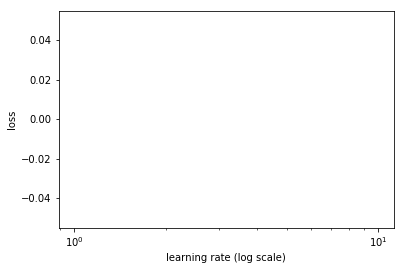

In [56]:
m.sched.plot(100)

In [66]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [67]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                 
    0      17.282513  22.122578  0.990936  
    1      10.008455  4.624422   0.883568                  
    2      6.298377   2.060176   0.761963                  



[2.0601761, 0.7619634773132353]

In [68]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                 
    0      3.383841   0.515338   0.51221   
    1      3.26861    0.425647   0.479214                  
    2      3.231367   0.97756    0.627946                  
    3      2.740155   1.696849   0.728184                  
    4      2.340726   0.682664   0.562306                  



[0.682664, 0.5623058142854479]

In [96]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [97]:
m.fit(lr, 1, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                 
    0      11.284121  9.789547   0.956231  



[9.789547, 0.9562308253441469]

In [98]:
m.fit(lr, 5, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                 
    0      4.648214   14.807849  0.97868   
    1      3.224631   12.111698  0.969198                  
    2      2.390885   11.977289  0.968596                  
    3      1.855831   8.12272    0.942158                  
    4      1.528352   10.389509  0.960176                  



[10.389509, 0.9601756852047625]

In [100]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                  
    0      0.938837   9.104759   0.951072  
    1      0.88404    10.265949  0.959403                   
    2      0.80767    9.827216   0.956493                   
    3      0.798249   11.353582  0.965593                   
    4      0.773039   5.835136   0.910686                   



[5.8351364, 0.9106864858172291]

In [101]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [104]:
m.fit(lr, 5, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                 
    0      1.365133   5.620534   0.906591  
    1      1.288376   7.008145   0.929157                  
    2      1.167706   3.608564   0.850375                  
    3      1.064974   6.468019   0.921388                  
    4      1.05314    6.464726   0.921337                  



[6.464726, 0.921337003028681]

In [105]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                  
    0      0.975882   6.157306   0.916373  
    1      0.851806   8.089388   0.941818                   
    2      0.771552   8.395683   0.944841                   



[8.395683, 0.9448407154466648]

In [106]:
m.save('val0')

In [107]:
m.load('val0')

In [108]:
x,y=m.predict_with_targs()

In [109]:
exp_rmspe(x,y)

0.9448407154466648

In [110]:
pred_test=m.predict(True)

In [111]:
pred_test = np.exp(pred_test)

In [112]:
joined_test['target']=pred_test

In [114]:
csv_fn=f'{PATH}tmp/sub1.csv'

In [115]:
joined_test[['ID','target']].to_csv(csv_fn, index=False)

In [116]:
FileLink(csv_fn)

/home/paperspace/santander/tmp/sub1.csv